In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/stacked_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 259s 19ms/step


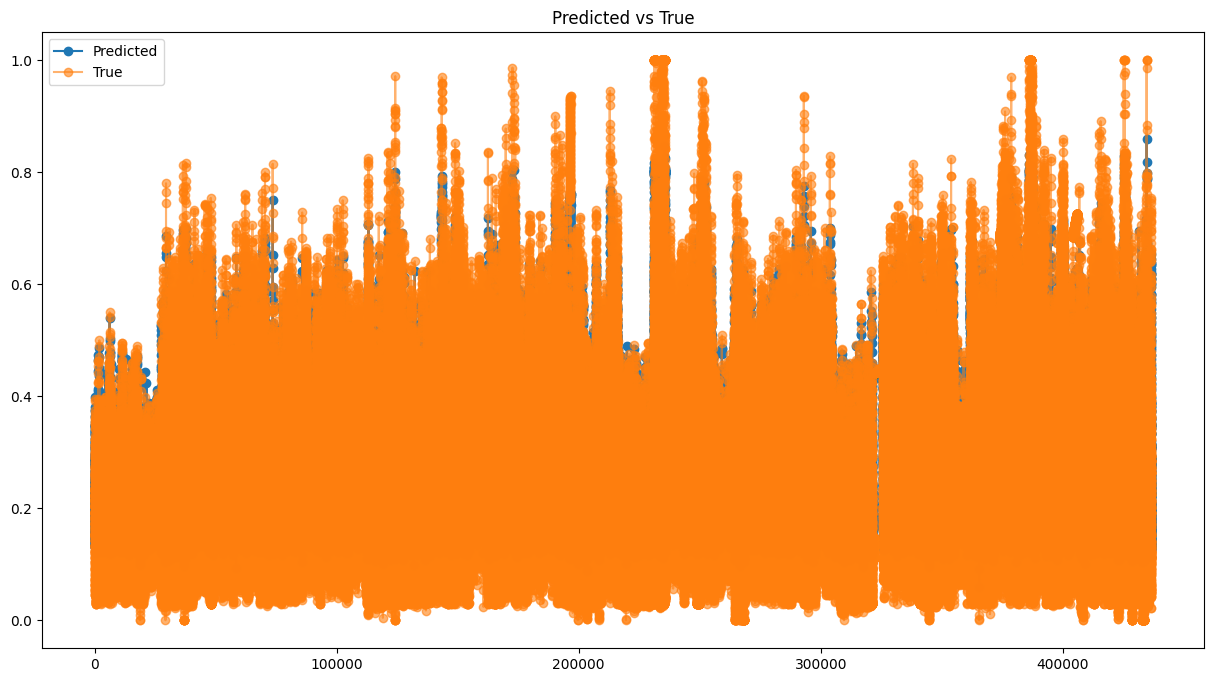

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028996891175608358,
 'mse': 0.038612394058240754,
 'rmse': 0.001490916974908866}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          147.762772
1          144.384903
2          144.737640
3          143.828873
4          155.097061
...               ...
436598     132.923935
436599     171.316528
436600     200.025833
436601     201.066025
436602     229.216827

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  147.762772
2023-01-01 00:15:00   140.0  144.384903
2023-01-01 00:30:00   139.0  144.737640
2023-01-01 00:45:00   145.0  143.828873
2023-01-01 01:00:00   159.0  155.097061
...                     ...         ...
2035-06-14 21:30:00   137.0  132.923935
2035-06-14 21:45:00   177.0  171.316528
2035-06-14 22:00:00   198.0  200.025833
2035-06-14 22:15:00   216.0  201.066025
2035-06-14 22:30:00   233.0  229.216827

[436603 rows x 2 columns]

AP, BE, EP: (0.9462599804856597, 0.008930330140494089, 0.044809689373846204)


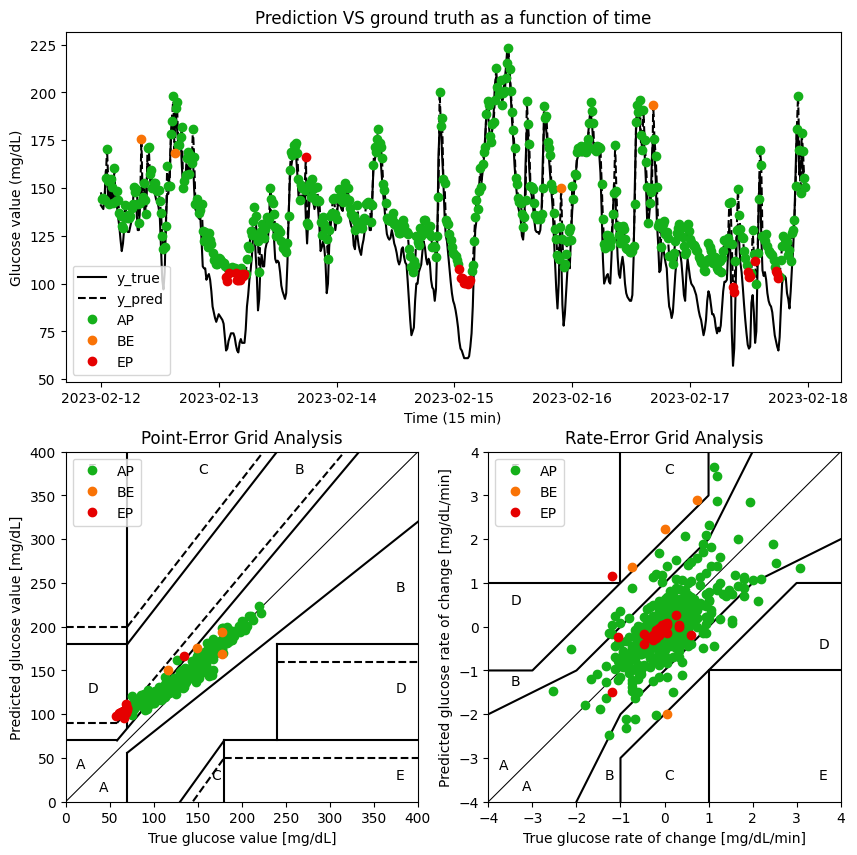

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  147.762772       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  144.384903 -0.066667 -0.225191     AP   
2      2023-02-12 00:30:00   139.0  144.737640 -0.066667  0.023516     AP   
3      2023-02-12 00:45:00   145.0  143.828873  0.400000 -0.060585     AP   
4      2023-02-12 01:00:00   159.0  155.097061  0.933333  0.751213     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  132.923935  2.333333  1.299030     AP   
436599 2035-07-26 21:45:00   177.0  171.316528  2.666667  2.559506     AP   
436600 2035-07-26 22:00:00   198.0  200.025833  1.400000  1.913954     AP   
436601 2035-07-26 22:15:00   216.0  201.066025  1.200000  0.069346     AP   
436602 2035-07-26 22:30:00   233.0  229.216827  1.133333  1.876720     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     B  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 37ms/step


Glucose level Predict  Glucose level True
0               0.234267            0.219565
1               0.226924            0.217391

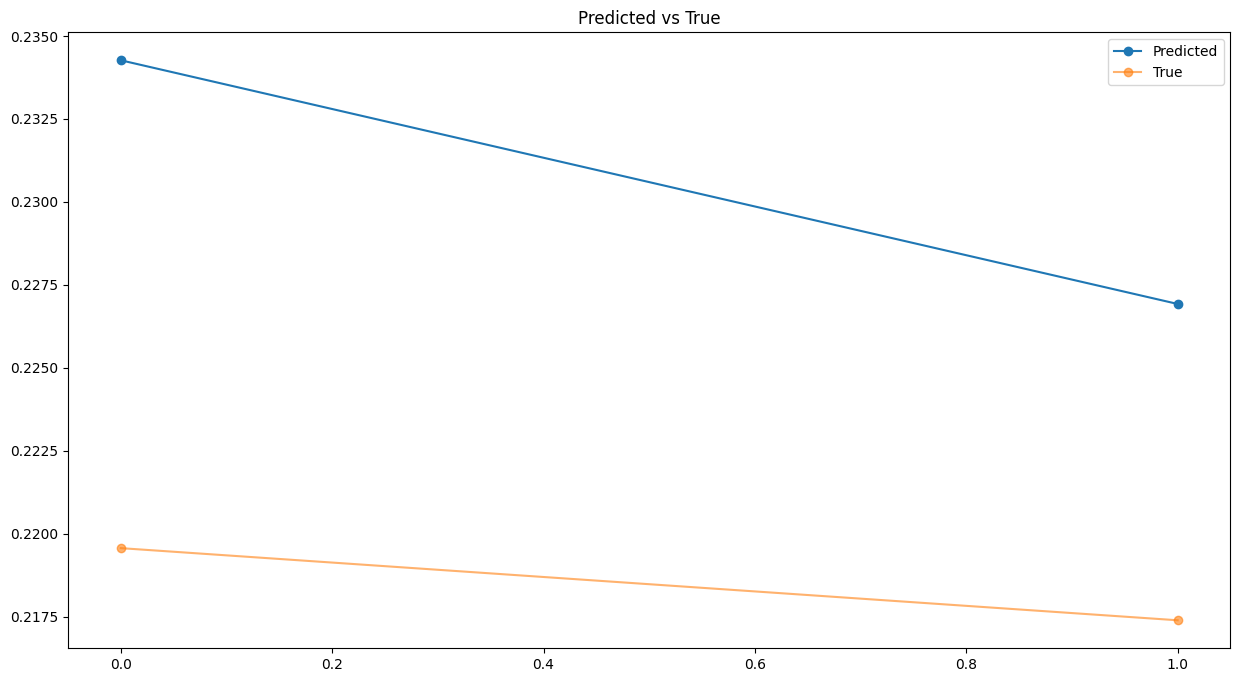

{'mae': 0.012117037241873518,
 'mse': 0.012389630431510174,
 'rmse': 0.00015350294222940298}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             147.762772               141.0
1             144.384903               140.0

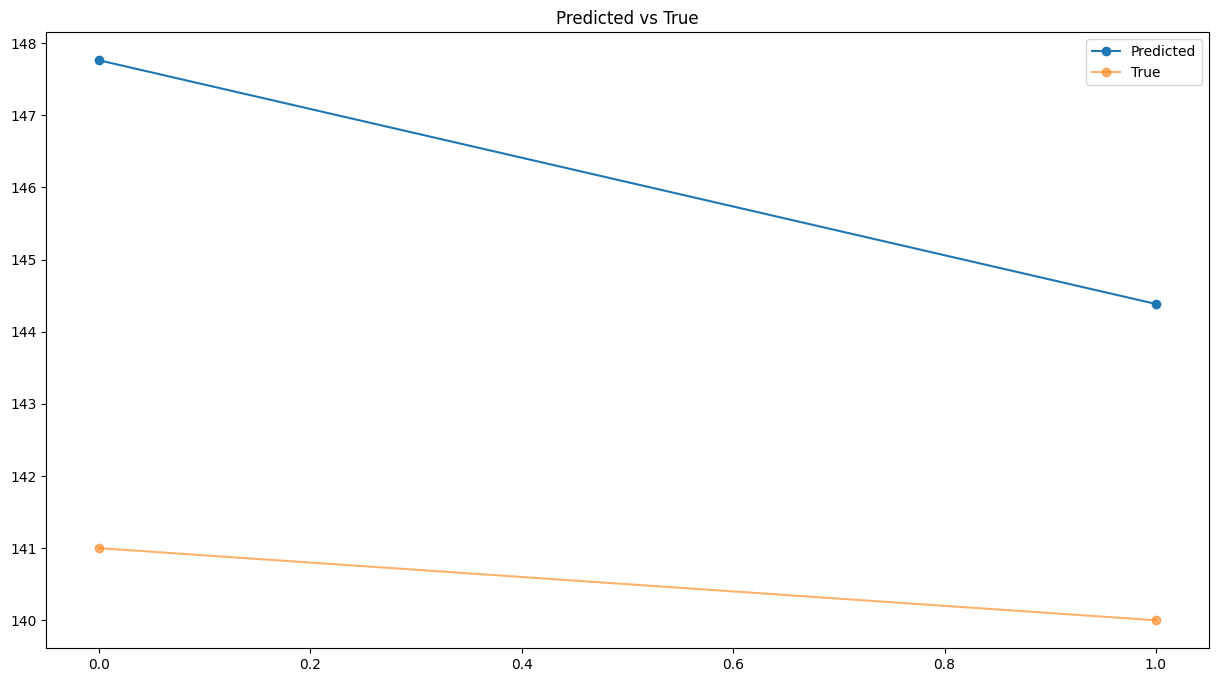

{'mae': 5.5738372802734375,
 'mse': 5.699230374262455,
 'rmse': 32.48122685891576}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 31ms/step


Glucose level Predict  Glucose level True
0               0.234267            0.219565
1               0.254254            0.217391

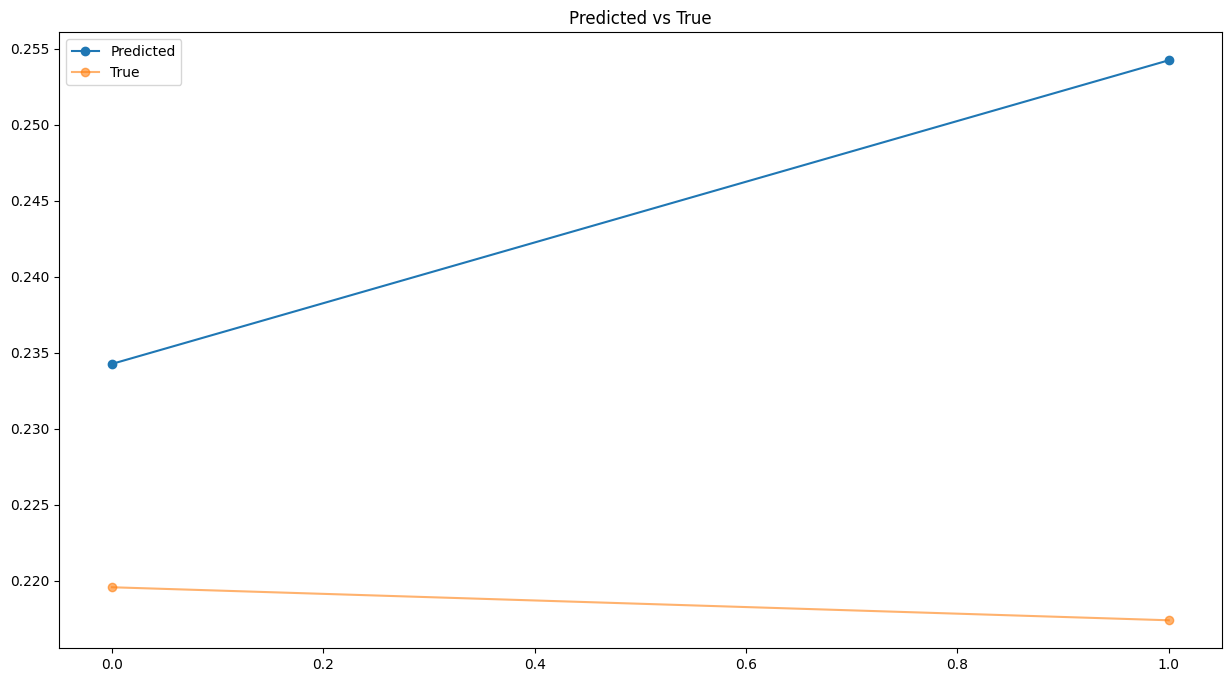

{'mae': 0.025782035355982558,
 'mse': 0.028062206069603683,
 'rmse': 0.0007874874094929017}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             147.762787               141.0
1             156.956696               140.0

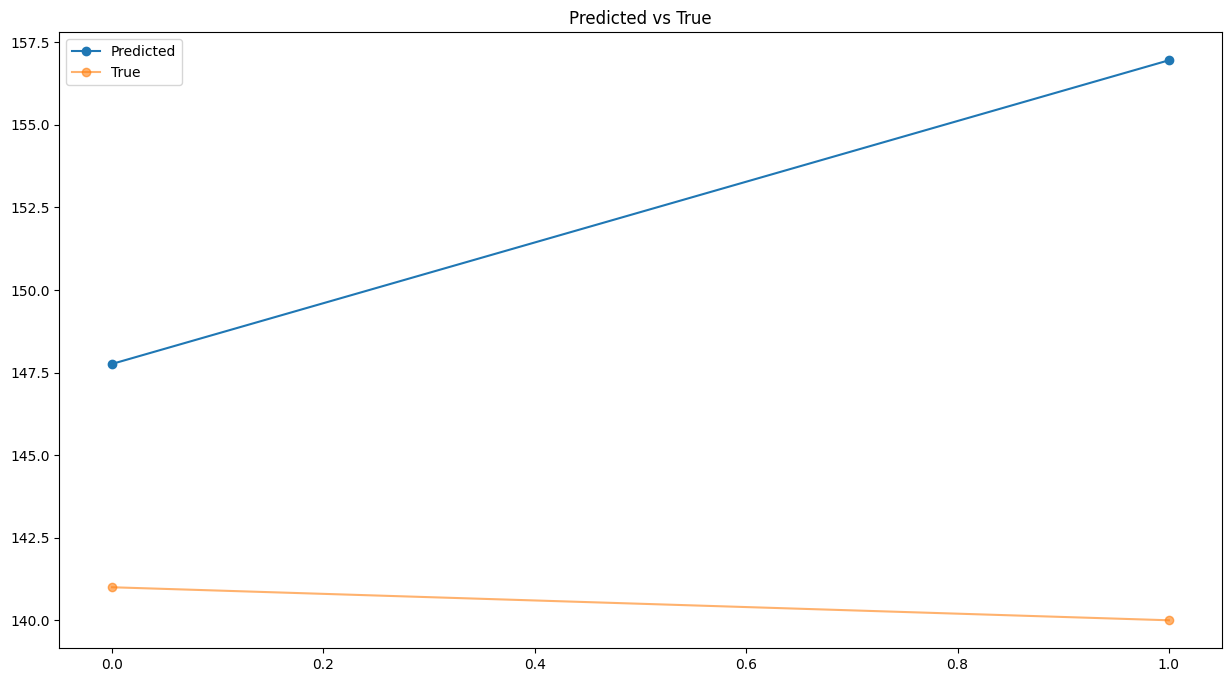

{'mae': 11.8597412109375,
 'mse': 12.908617477971498,
 'rmse': 166.63240519259125}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 10ms/step


Glucose level Predict  Glucose level True
0               0.236743            0.182609
1               0.187388            0.154348
2               0.186962            0.152174
3               0.186526            0.150000
4               0.184080            0.123913

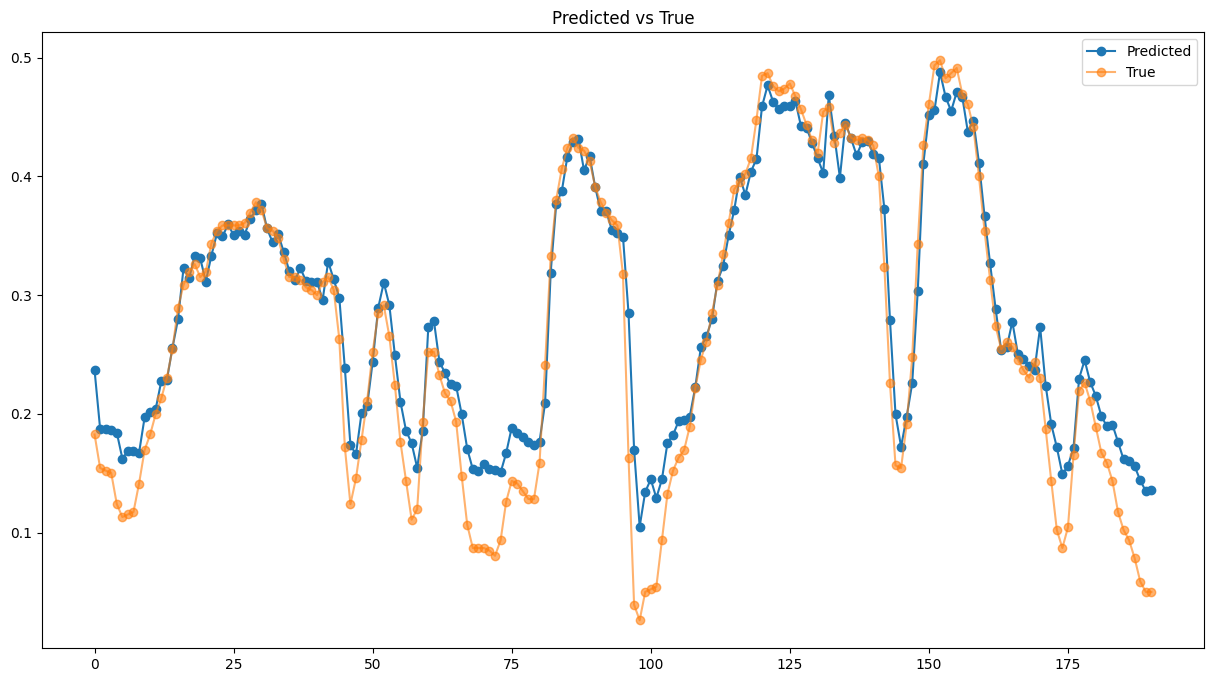

{'mae': 0.025854338448763486,
 'mse': 0.03584854413542529,
 'rmse': 0.001285118116629535}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

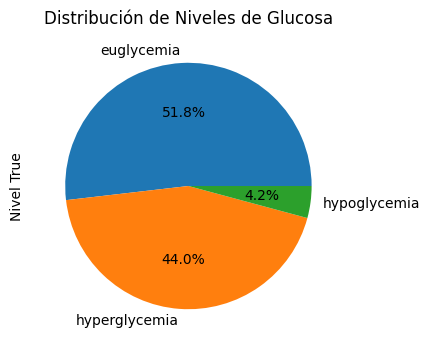

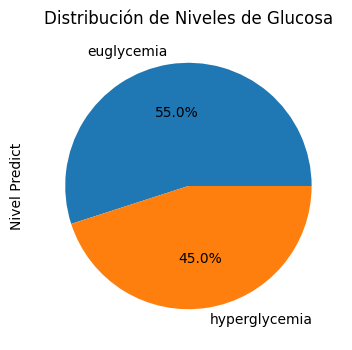

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             148.901718    euglycemia
1               111.0  euglycemia             126.198692    euglycemia
2               110.0  euglycemia             126.002518    euglycemia
3               109.0  euglycemia             125.802086    euglycemia
4                97.0  euglycemia             124.676987    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


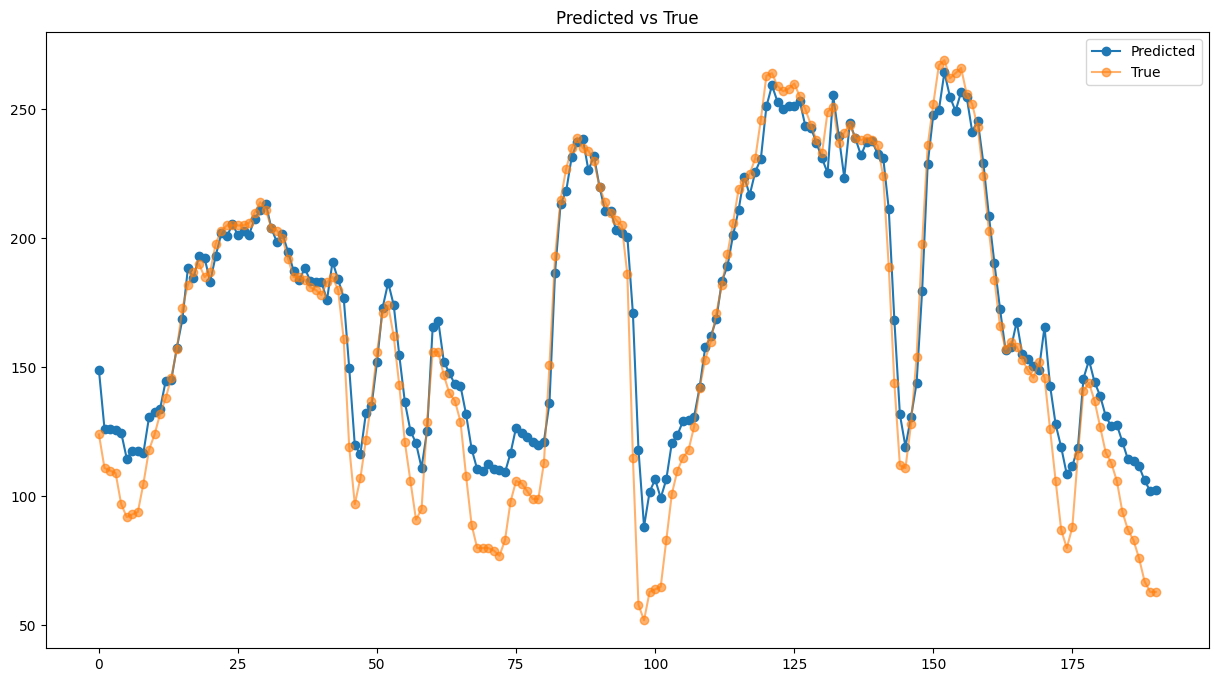

{'mae': 11.892997342254478,
 'mse': 16.490330728507754,
 'rmse': 271.9310075355671}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  148.901718
2023-01-01 00:15:00   111.0  126.198692
2023-01-01 00:30:00   110.0  126.002518
2023-01-01 00:45:00   109.0  125.802086
2023-01-01 01:00:00    97.0  124.676987
...                     ...         ...
2023-01-02 22:30:00    83.0  113.858192
2023-01-02 22:45:00    76.0  111.657433
2023-01-02 23:00:00    67.0  106.194550
2023-01-02 23:15:00    63.0  102.041222
2023-01-02 23:30:00    63.0  102.445450

[191 rows x 2 columns]

AP, BE, EP: (0.9578947368421052, 0.0, 0.042105263157894736)


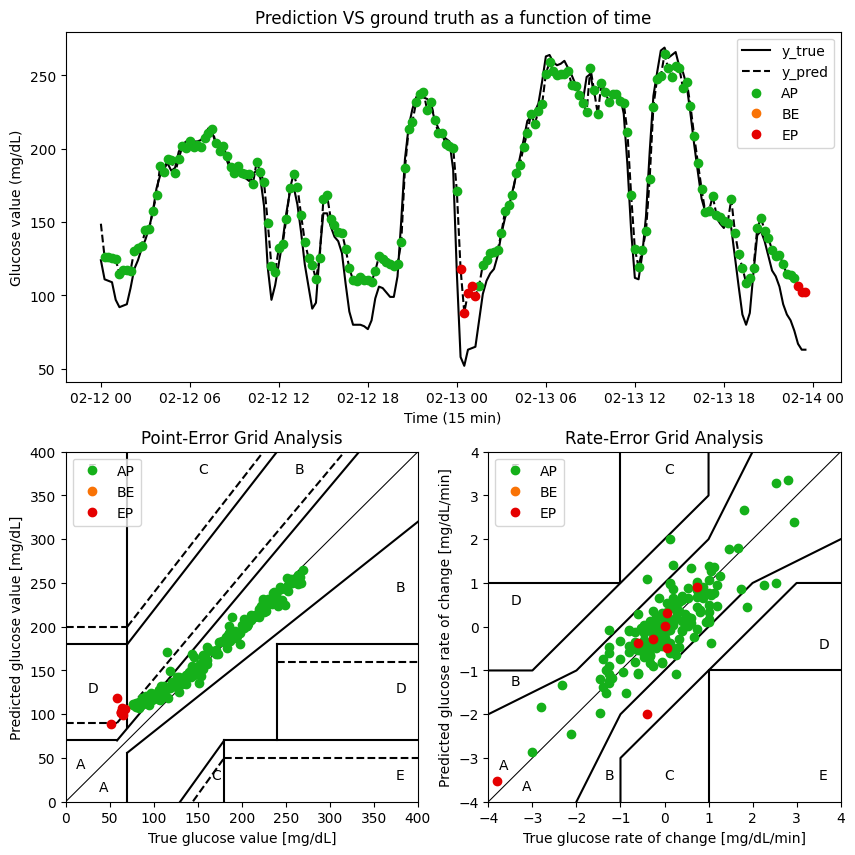

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 1s 10ms/step


Glucose level Predict  Glucose level True
0               0.366150            0.373913
1               0.381352            0.400000
2               0.412752            0.404348
3               0.387596            0.406522
4               0.407083            0.397826

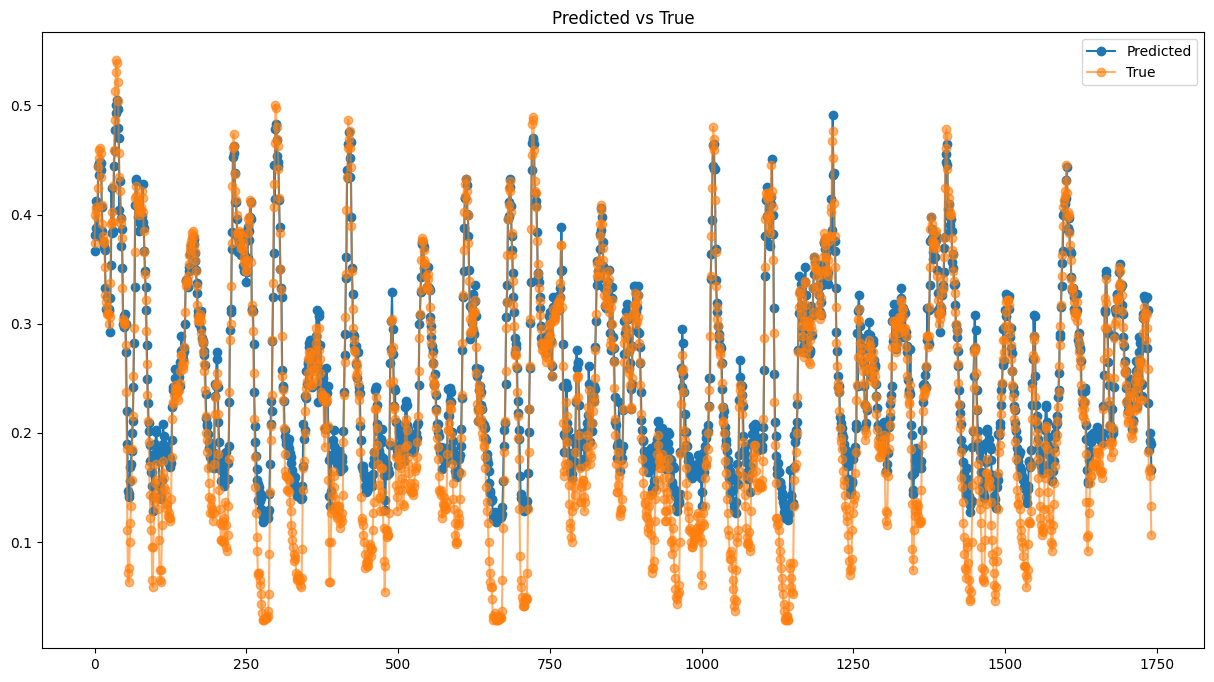

{'mae': 0.028500591411842722,
 'mse': 0.03786530162664307,
 'rmse': 0.0014337810672766583}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

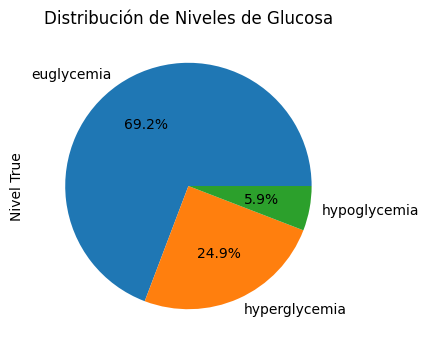

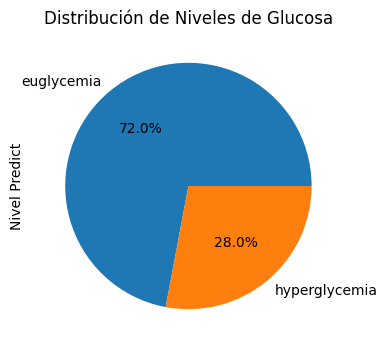

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             208.428848  hyperglycemia
1               224.0  hyperglycemia             215.422043  hyperglycemia
2               226.0  hyperglycemia             229.865799  hyperglycemia
3               227.0  hyperglycemia             218.294235  hyperglycemia
4               223.0  hyperglycemia             227.258209  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


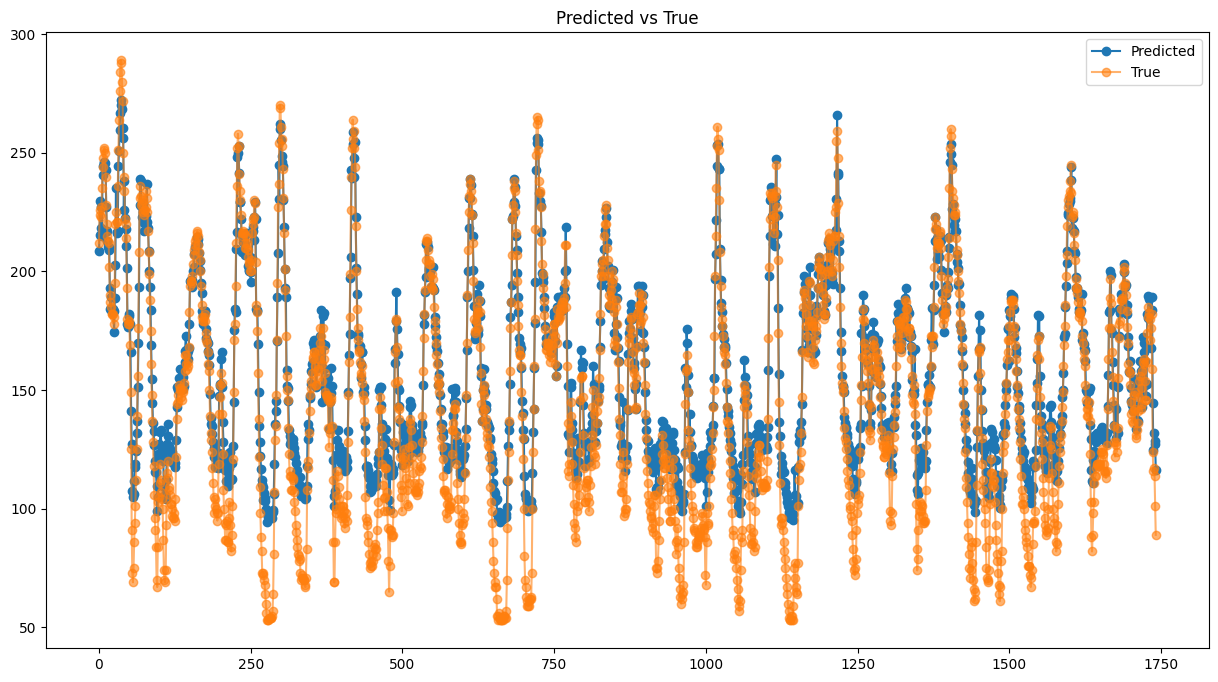

{'mae': 13.110272576514214,
 'mse': 17.41803873965656,
 'rmse': 303.3880735361767}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  208.428848
2023-01-01 00:15:00   224.0  215.422043
2023-01-01 00:30:00   226.0  229.865799
2023-01-01 00:45:00   227.0  218.294235
2023-01-01 01:00:00   223.0  227.258209
...                     ...         ...
2023-01-19 02:15:00   116.0  124.710243
2023-01-19 02:30:00   117.0  131.877716
2023-01-19 02:45:00   114.0  128.474304
2023-01-19 03:00:00   101.0  127.422020
2023-01-19 03:15:00    89.0  116.465103

[1742 rows x 2 columns]

AP, BE, EP: (0.9368179207352096, 0.004595060310166571, 0.05858701895462378)


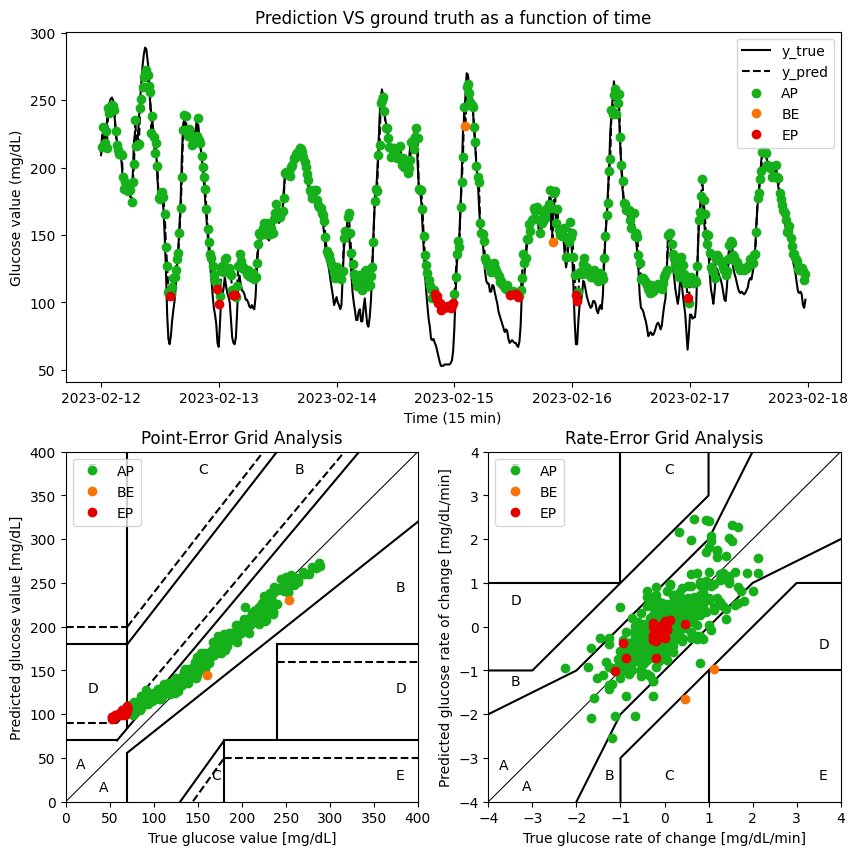

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 8ms/step


Glucose level Predict  Glucose level True
0               0.278237            0.261858
1               0.243478            0.229051
2               0.220613            0.196245
3               0.197743            0.163439
4               0.182309            0.130632

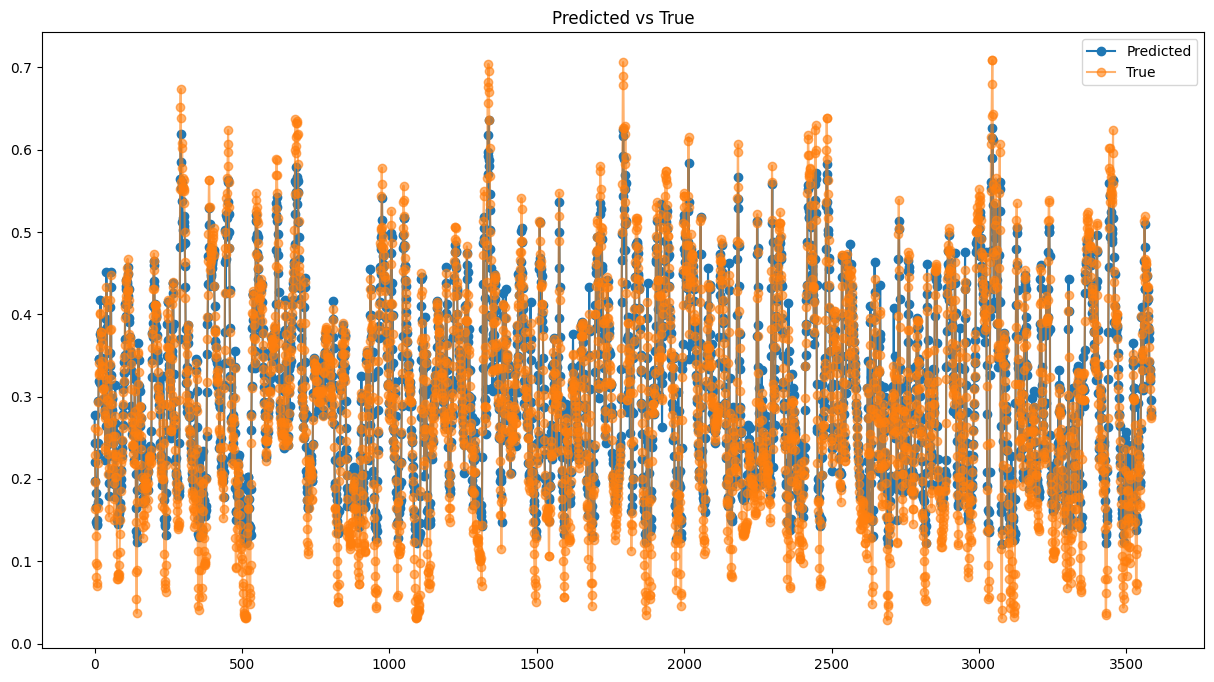

{'mae': 0.025436458192973344,
 'mse': 0.0336121652133363,
 'rmse': 0.001129777650328615}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

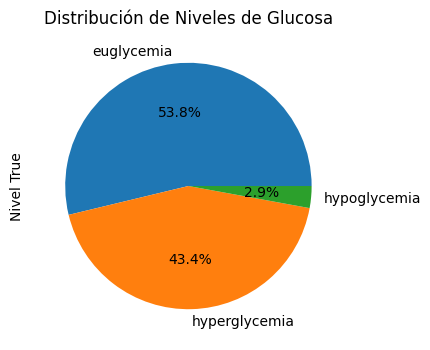

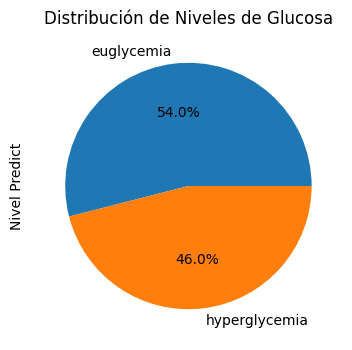

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             167.989136    euglycemia
1          145.363636  euglycemia             151.999969    euglycemia
2          130.272727  euglycemia             141.482040    euglycemia
3          115.181818  euglycemia             130.962006    euglycemia
4          100.090909  euglycemia             123.862160    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


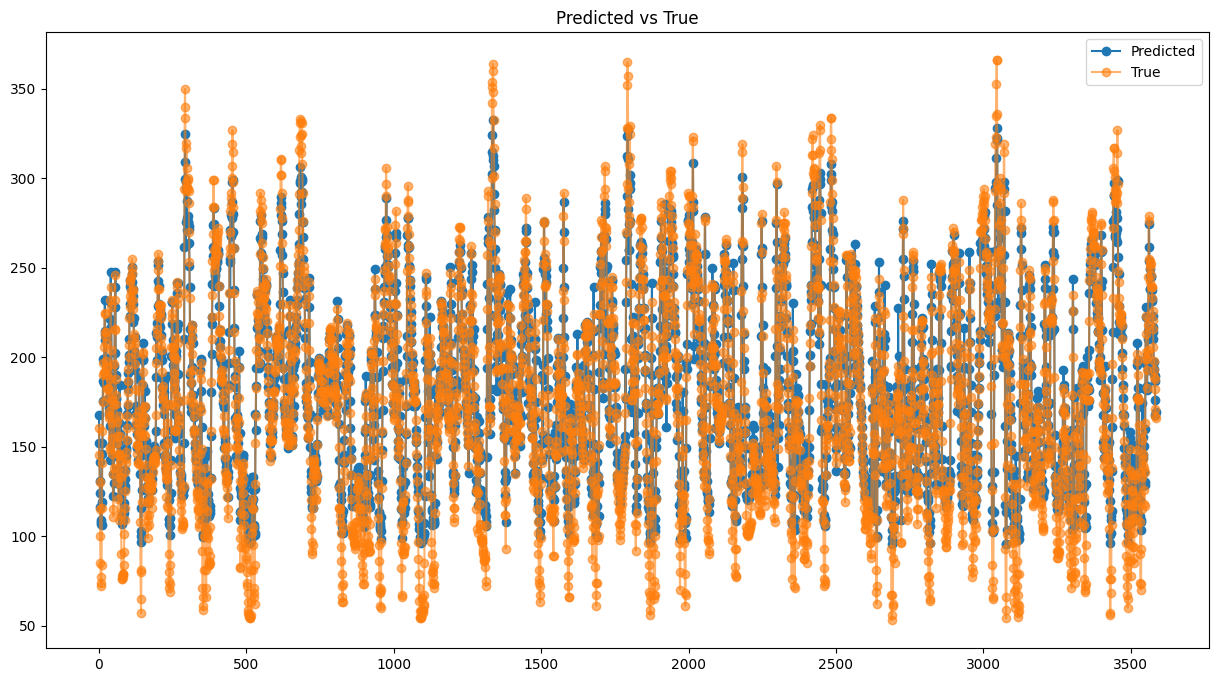

{'mae': 11.700771990629713, 'mse': 15.4615968692285, 'rmse': 239.0609777465366}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  167.989136
2023-01-01 00:15:00  145.363636  151.999969
2023-01-01 00:30:00  130.272727  141.482040
2023-01-01 00:45:00  115.181818  130.962006
2023-01-01 01:00:00  100.090909  123.862160
...                         ...         ...
2023-02-07 07:15:00  188.000000  186.537155
2023-02-07 07:30:00  182.000000  189.582336
2023-02-07 07:45:00  171.000000  175.873352
2023-02-07 08:00:00  167.000000  168.003281
2023-02-07 08:15:00  166.000000  169.654388

[3586 rows x 2 columns]

AP, BE, EP: (0.9523012552301255, 0.016736401673640166, 0.03096234309623431)


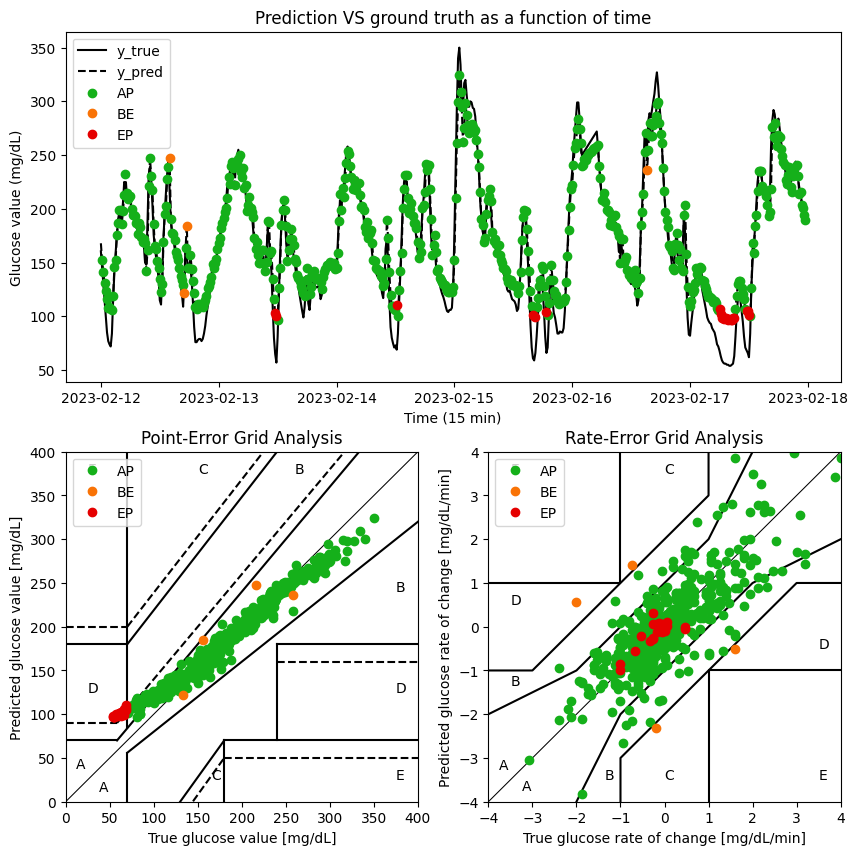

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 9ms/step


Glucose level Predict  Glucose level True
0               0.503931            0.534783
1               0.494075            0.500000
2               0.452465            0.484783
3               0.464345            0.463043
4               0.433038            0.428261

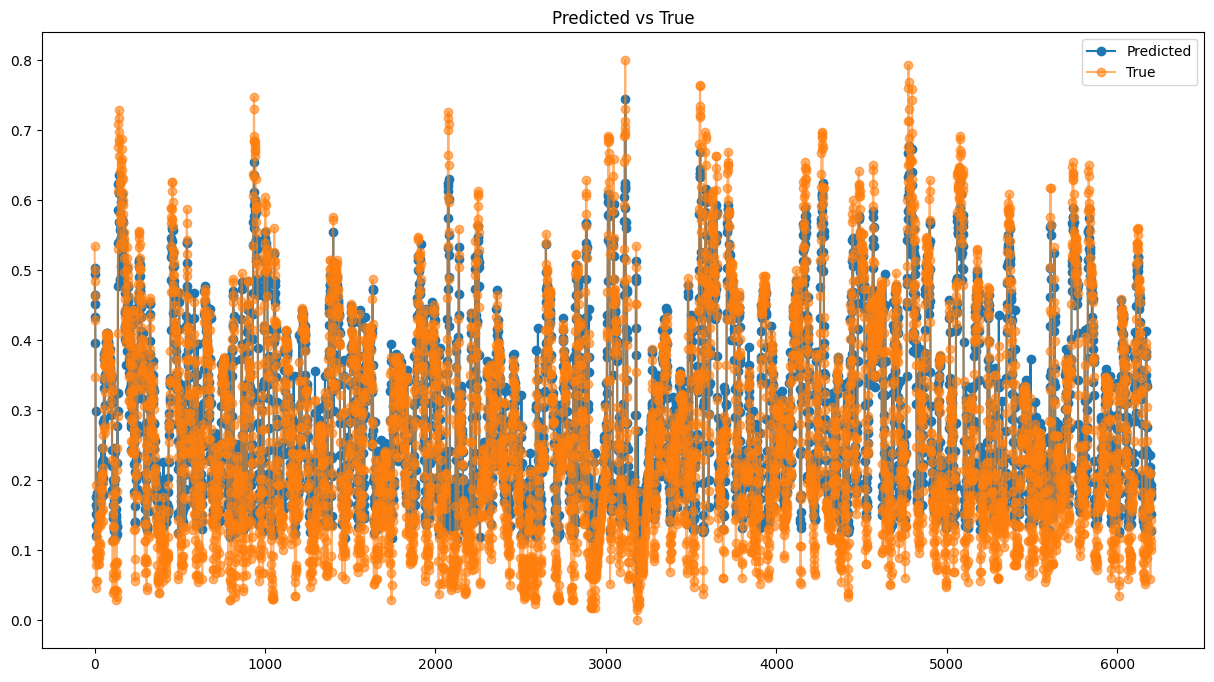

{'mae': 0.03397440620012646,
 'mse': 0.04307275573326948,
 'rmse': 0.0018552622864578987}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

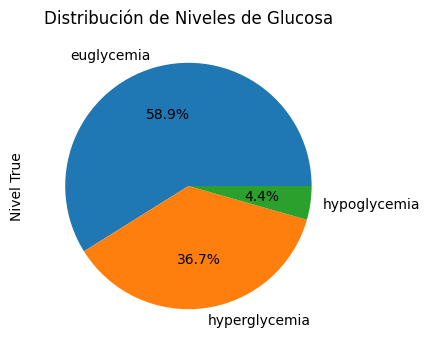

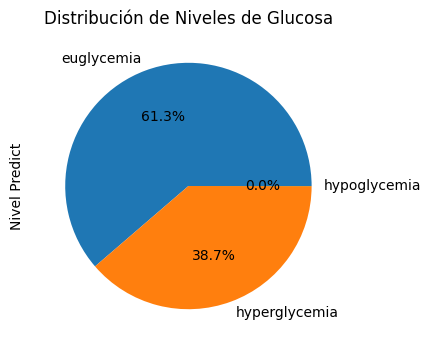

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             271.808319  hyperglycemia
1               270.0  hyperglycemia             267.274353  hyperglycemia
2               263.0  hyperglycemia             248.133972  hyperglycemia
3               253.0  hyperglycemia             253.598648  hyperglycemia
4               237.0  hyperglycemia             239.197525  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


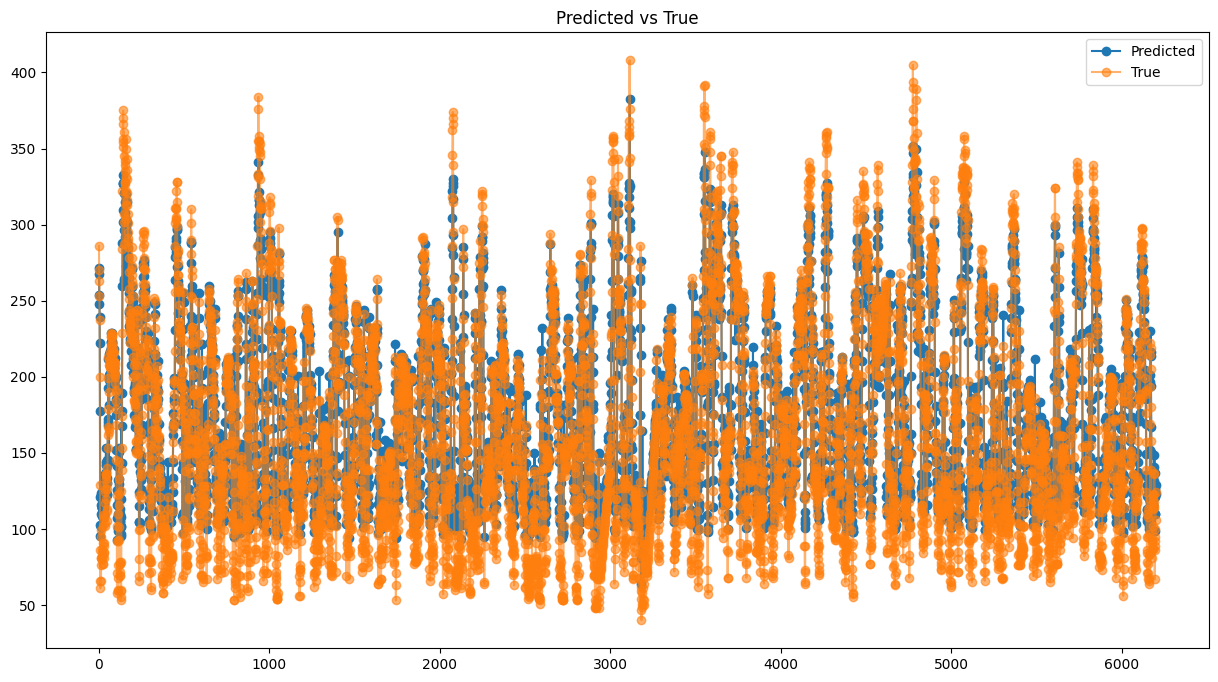

{'mae': 15.628228071920427,
 'mse': 19.813468667556943,
 'rmse': 392.57354064026066}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  271.808319
2023-01-01 00:15:00   270.0  267.274353
2023-01-01 00:30:00   263.0  248.133972
2023-01-01 00:45:00   253.0  253.598648
2023-01-01 01:00:00   237.0  239.197525
...                     ...         ...
2023-03-06 13:00:00   100.0  126.248703
2023-03-06 13:15:00    89.0  121.049469
2023-03-06 13:30:00    92.0  109.957405
2023-03-06 13:45:00   106.0  122.769104
2023-03-06 14:00:00   124.0  128.832458

[6201 rows x 2 columns]

AP, BE, EP: (0.93, 0.02193548387096774, 0.04806451612903226)


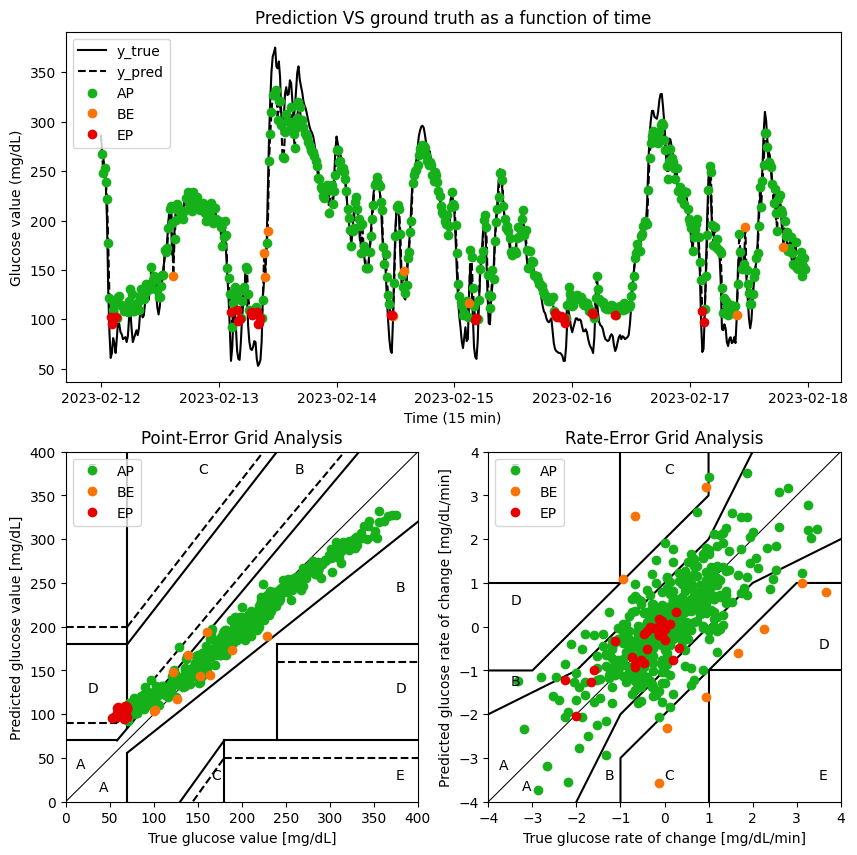

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)